In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

622

In [5]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | torbay
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | bethel
Processing Record 4 of Set 1 | kraslava
Processing Record 5 of Set 1 | hay river
Processing Record 6 of Set 1 | coquimbo
Processing Record 7 of Set 1 | mar del plata
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | hasaki
Processing Record 10 of Set 1 | saleaula
City not found. Skipping...
Processing Record 11 of Set 1 | yuli
Processing Record 12 of Set 1 | bredasdorp
Processing Record 13 of Set 1 | taksimo
Processing Record 14 of Set 1 | gondanglegi
Processing Record 15 of Set 1 | qaanaaq
Processing Record 16 of Set 1 | cape town
Processing Record 17 of Set 1 | nikolskoye
Processing Record 18 of Set 1 | mahebourg
Processing Record 19 of Set 1 | pangnirtung
Processing Record 20 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 21 of Set 1 | iwakuni
Processing Record 22 of Se

Processing Record 34 of Set 4 | jinka
Processing Record 35 of Set 4 | morbegno
Processing Record 36 of Set 4 | burica
City not found. Skipping...
Processing Record 37 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 38 of Set 4 | takaungu
Processing Record 39 of Set 4 | rawson
Processing Record 40 of Set 4 | cabo san lucas
Processing Record 41 of Set 4 | yulara
Processing Record 42 of Set 4 | aliwal north
Processing Record 43 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 44 of Set 4 | la rochelle
Processing Record 45 of Set 4 | porterville
Processing Record 46 of Set 4 | avera
Processing Record 47 of Set 4 | sakakah
Processing Record 48 of Set 4 | kapaa
Processing Record 49 of Set 4 | tuktoyaktuk
Processing Record 50 of Set 4 | joshimath
Processing Record 1 of Set 5 | pori
Processing Record 2 of Set 5 | port hedland
Processing Record 3 of Set 5 | ribeira grande
Processing Record 4 of Set 5 | kodiak
Processing Record 5 of Set 5 | nanchang
Processi

Processing Record 21 of Set 8 | grimari
City not found. Skipping...
Processing Record 22 of Set 8 | solnechnyy
Processing Record 23 of Set 8 | elsfleth
Processing Record 24 of Set 8 | saint-georges
Processing Record 25 of Set 8 | mangrul pir
Processing Record 26 of Set 8 | padang
Processing Record 27 of Set 8 | old saybrook
Processing Record 28 of Set 8 | narsaq
Processing Record 29 of Set 8 | banda aceh
Processing Record 30 of Set 8 | la crosse
Processing Record 31 of Set 8 | maceio
Processing Record 32 of Set 8 | paita
Processing Record 33 of Set 8 | vodnyy
Processing Record 34 of Set 8 | temaraia
City not found. Skipping...
Processing Record 35 of Set 8 | ponta delgada
Processing Record 36 of Set 8 | santa ines
Processing Record 37 of Set 8 | poltavka
Processing Record 38 of Set 8 | lasa
Processing Record 39 of Set 8 | lodja
Processing Record 40 of Set 8 | urucara
Processing Record 41 of Set 8 | porto de moz
Processing Record 42 of Set 8 | leh
Processing Record 43 of Set 8 | sorvag


Processing Record 11 of Set 12 | general roca
Processing Record 12 of Set 12 | port lincoln
Processing Record 13 of Set 12 | salalah
Processing Record 14 of Set 12 | kholodnyy
Processing Record 15 of Set 12 | waterloo
Processing Record 16 of Set 12 | hervey bay
Processing Record 17 of Set 12 | elliot lake
Processing Record 18 of Set 12 | samana
Processing Record 19 of Set 12 | marawi
Processing Record 20 of Set 12 | werota
Processing Record 21 of Set 12 | teknaf
Processing Record 22 of Set 12 | znamenskoye
Processing Record 23 of Set 12 | aurora
Processing Record 24 of Set 12 | tingo maria
Processing Record 25 of Set 12 | katherine
Processing Record 26 of Set 12 | stornoway
Processing Record 27 of Set 12 | singaparna
Processing Record 28 of Set 12 | juneau
Processing Record 29 of Set 12 | tura
Processing Record 30 of Set 12 | umm durman
City not found. Skipping...
Processing Record 31 of Set 12 | santiago de cao
Processing Record 32 of Set 12 | umzimvubu
City not found. Skipping...
Pro

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Torbay,47.67,-52.73,32.00,86,90,20.80,CA,2021-01-03 20:10:18
1,Busselton,-33.65,115.33,59.00,78,0,5.01,AU,2021-01-03 20:10:19
2,Bethel,41.37,-73.41,33.80,74,90,6.93,US,2021-01-03 20:10:19
3,Kraslava,55.90,27.17,26.13,98,100,6.24,LV,2021-01-03 20:10:19
4,Hay River,60.82,-115.80,-7.60,76,93,4.70,CA,2021-01-03 20:09:17
5,Coquimbo,-29.95,-71.34,64.40,72,75,10.29,CL,2021-01-03 20:09:00
6,Mar Del Plata,-38.00,-57.56,80.60,57,0,13.87,AR,2021-01-03 20:09:14
7,Ushuaia,-54.80,-68.30,51.80,50,75,12.75,AR,2021-01-03 20:10:20
8,Hasaki,35.73,140.83,30.20,92,75,4.70,JP,2021-01-03 20:10:20
9,Yuli,9.70,10.27,80.55,19,0,4.29,NG,2021-01-03 20:10:20


In [10]:
new_headers = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", 
               "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_headers]

city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Torbay,CA,2021-01-03 20:10:18,47.67,-52.73,32.00,86,90,20.80
1,Busselton,AU,2021-01-03 20:10:19,-33.65,115.33,59.00,78,0,5.01
2,Bethel,US,2021-01-03 20:10:19,41.37,-73.41,33.80,74,90,6.93
3,Kraslava,LV,2021-01-03 20:10:19,55.90,27.17,26.13,98,100,6.24
4,Hay River,CA,2021-01-03 20:09:17,60.82,-115.80,-7.60,76,93,4.70
...,...,...,...,...,...,...,...,...,...
560,Ubon Ratchathani,TH,2021-01-03 20:12:57,15.17,105.17,64.40,88,0,8.05
561,Wilmington,US,2021-01-03 20:11:32,34.23,-77.94,71.01,52,1,12.75
562,Wanning,CN,2021-01-03 20:12:58,18.80,110.40,64.60,86,100,10.98
563,Farafangana,MG,2021-01-03 20:12:58,-22.82,47.83,74.48,84,5,6.38


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

'01/03/21'

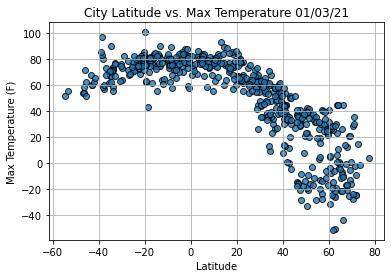

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

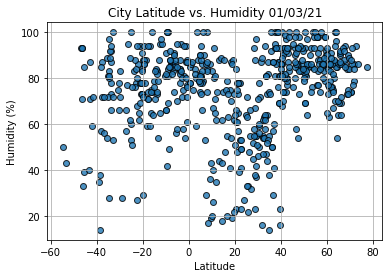

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

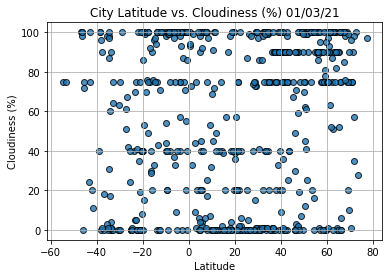

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

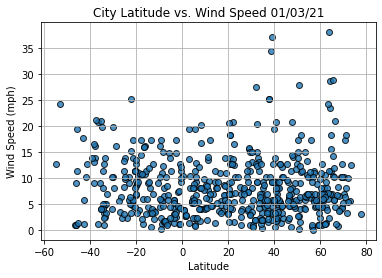

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [34]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [22]:
index13 = city_data_df.loc[13]
index13

City                      Qaanaaq
Country                        GL
Date          2021-01-03 20:10:22
Lat                         77.48
Lng                        -69.36
Max Temp                     3.88
Humidity                       85
Cloudiness                     97
Wind Speed                      3
Name: 13, dtype: object

In [23]:
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3       True
4       True
       ...  
560     True
561     True
562     True
563    False
564    False
Name: Lat, Length: 565, dtype: bool

In [24]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Torbay,CA,2021-01-03 20:10:18,47.67,-52.73,32.00,86,90,20.80
2,Bethel,US,2021-01-03 20:10:19,41.37,-73.41,33.80,74,90,6.93
3,Kraslava,LV,2021-01-03 20:10:19,55.90,27.17,26.13,98,100,6.24
4,Hay River,CA,2021-01-03 20:09:17,60.82,-115.80,-7.60,76,93,4.70
8,Hasaki,JP,2021-01-03 20:10:20,35.73,140.83,30.20,92,75,4.70


In [25]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

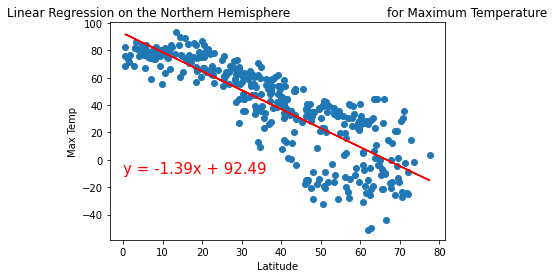

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(0,-10))
plt.show()

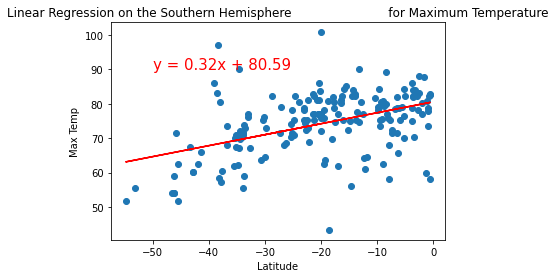

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

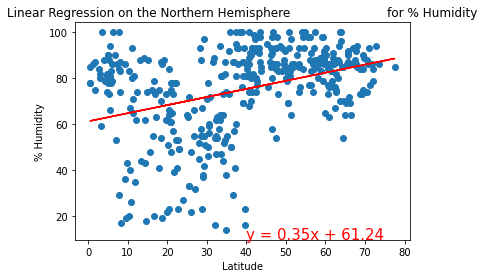

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

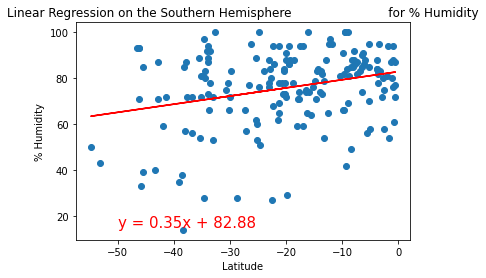

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

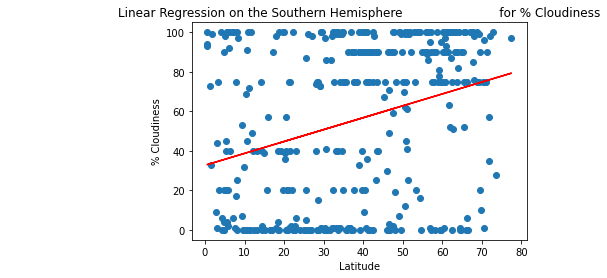

In [48]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

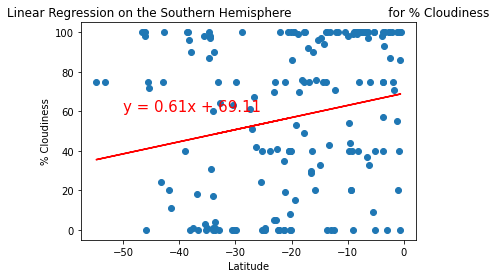

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

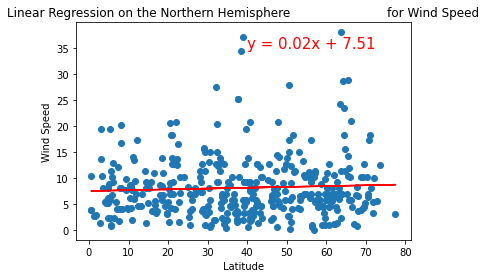

In [50]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

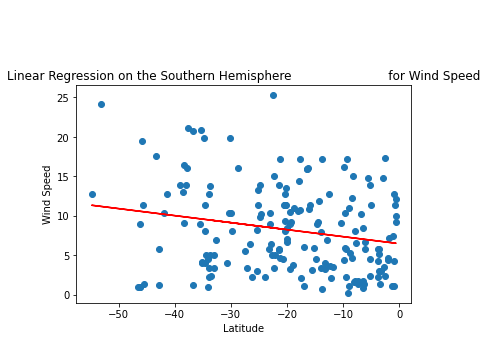

In [51]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))